## Data Cleaning and Preprocessing Notebook

This notebook is to be strictly used for data cleaning and preprocessing purposes. Steps:

1. Read the dataset
2. Handle Missing Values (if any).
3. Do visualizations as required
4. Explore your data here
5. Save the cleaned and processed dataset as `data/final_dataset.csv`.

# Importing the required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sts
from sklearn.model_selection import train_test_split

# Reading the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\mitug\ML-Project-Regression\data\CrabAgePrediction.csv")

In [4]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


# Checking for Missing Values

In [6]:
column_names = df.columns
column_nulls = []
for i in column_names:
    column_nulls.append(sum(df[i].isnull()))
column_nulls

[0, 0, 0, 0, 0, 0, 0, 0, 0]

# Exploring the Target Variable

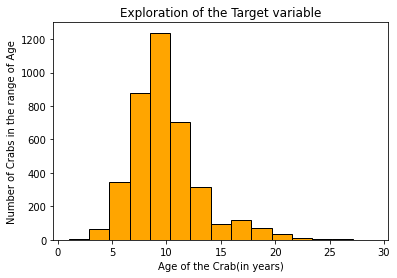

In [7]:
target = df['Age']
plt.hist(target,edgecolor='black',color='orange',bins=15)
plt.title('Exploration of the Target variable')
plt.xlabel('Age of the Crab(in years)')
plt.ylabel('Number of Crabs in the range of Age')
plt.show()

# Seggregation of Columns
  
  Every column is classified under categorial and numerical columns.

In [8]:
categorial = ['Sex']
numerical = list(set(column_names)-set(['Sex','Age']))

# Handling the Numerical columns

In [9]:
numerical

['Weight',
 'Shell Weight',
 'Diameter',
 'Length',
 'Viscera Weight',
 'Height',
 'Shucked Weight']

## Visualizing the Distribution of Numerical Variables

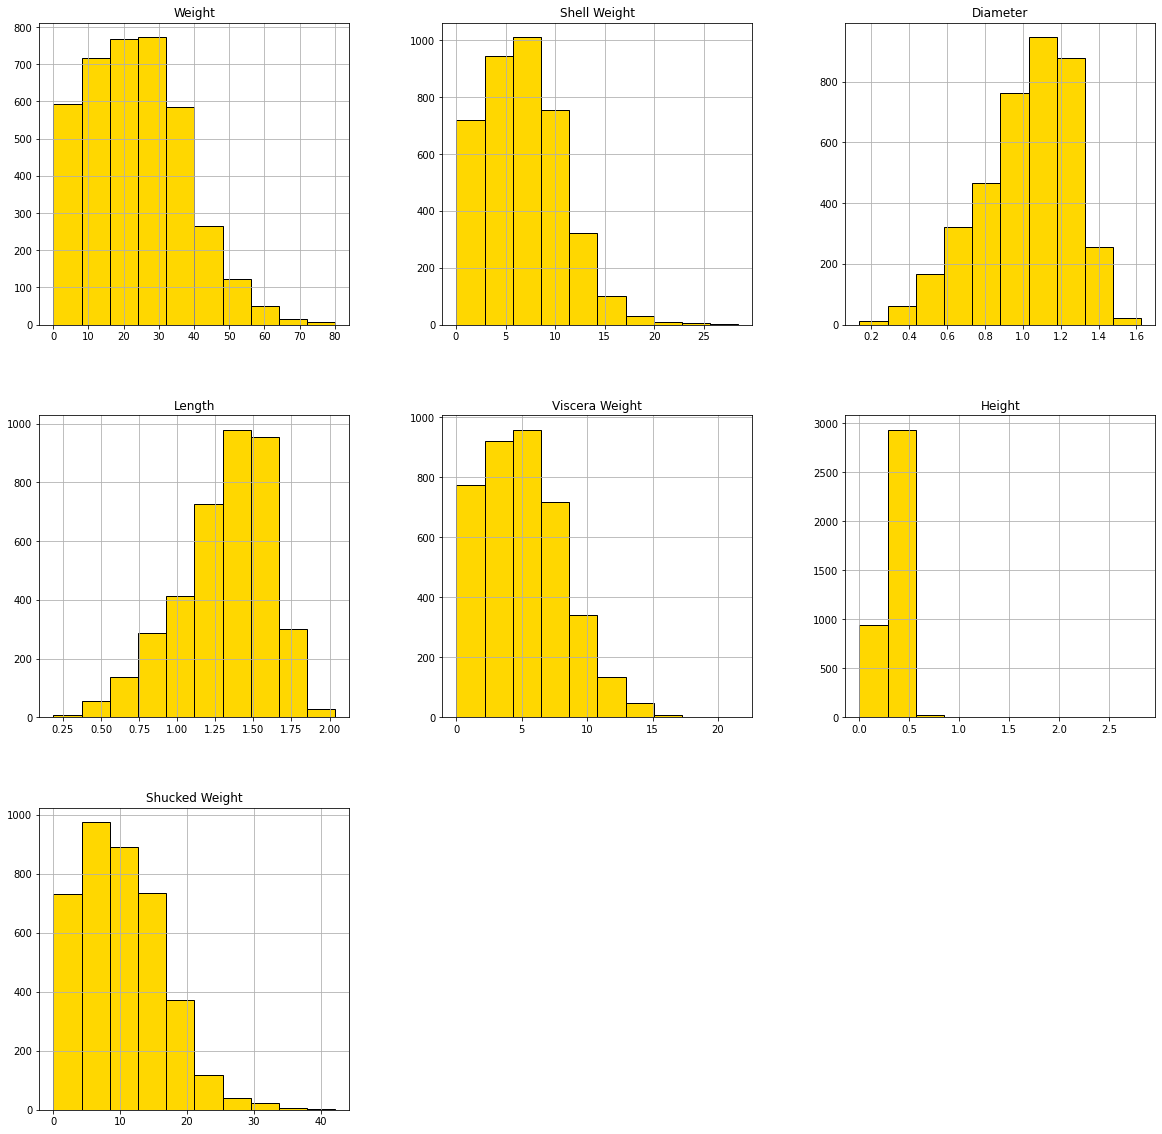

In [10]:
df[numerical].hist(figsize=(20,20),edgecolor='black',color='gold')
plt.show()

## Exploring the variation of the target variable based on each numerical feature

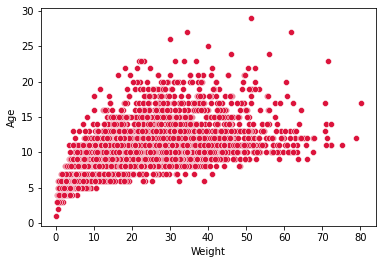

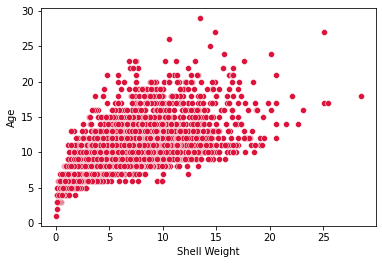

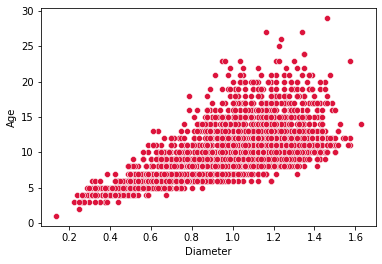

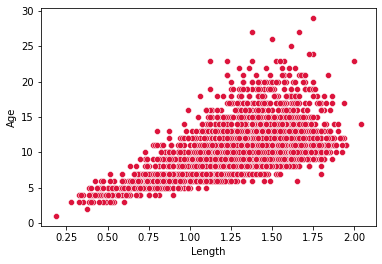

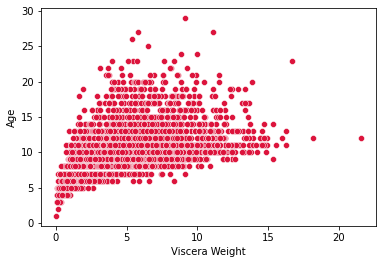

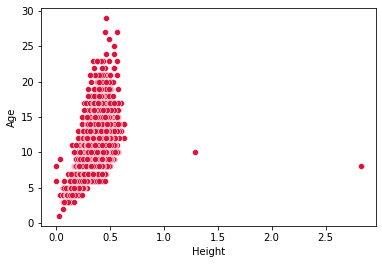

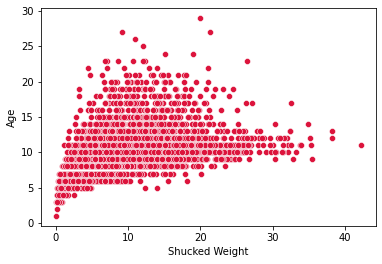

In [11]:
for i in numerical:
    sns.scatterplot(x=df[i],y=df['Age'],color='crimson')
    plt.show()

# Handling the Categorial Variables

In [12]:
df['Sex']

0       F
1       M
2       I
3       F
4       I
       ..
3888    F
3889    F
3890    I
3891    I
3892    I
Name: Sex, Length: 3893, dtype: object

## Mapping the categorical variable

In [13]:
categorial
mapping = {'I' : 0,'M': 1,'F' : 2}

df['Sex'] = df['Sex'].map(mapping)
df['Sex']

0       2
1       1
2       0
3       2
4       0
       ..
3888    2
3889    2
3890    0
3891    0
3892    0
Name: Sex, Length: 3893, dtype: int64

## Exploring the variation of the Target variable due to the Categorical Variable

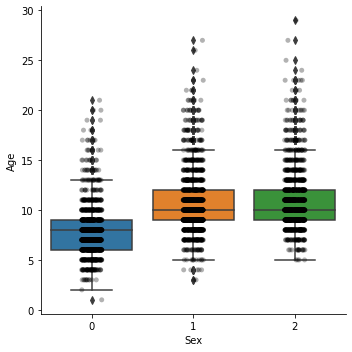

In [14]:
sns.catplot(x='Sex',y='Age',data=df,kind='box')
sns.stripplot(x='Sex', y='Age', data=df, jitter=0.1, alpha=0.3, color='k')
plt.show()

# Splitting the Dataset into Train and Test

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df,
    df['Age'],
    test_size = 0.1,
    train_size=0.9,
    random_state = 0
)

## Writing the Train dataset to a CSV file

In [16]:
X_train.to_csv(r"C:\Users\mitug\ML-Project-Regression\data\train.csv")
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 3814 to 2732
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3503 non-null   int64  
 1   Length          3503 non-null   float64
 2   Diameter        3503 non-null   float64
 3   Height          3503 non-null   float64
 4   Weight          3503 non-null   float64
 5   Shucked Weight  3503 non-null   float64
 6   Viscera Weight  3503 non-null   float64
 7   Shell Weight    3503 non-null   float64
 8   Age             3503 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 273.7 KB


## Writing the Test dataset to a CSV file

In [17]:
X_test.to_csv(r"C:\Users\mitug\ML-Project-Regression\data\test.csv")
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1385 to 3124
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             390 non-null    int64  
 1   Length          390 non-null    float64
 2   Diameter        390 non-null    float64
 3   Height          390 non-null    float64
 4   Weight          390 non-null    float64
 5   Shucked Weight  390 non-null    float64
 6   Viscera Weight  390 non-null    float64
 7   Shell Weight    390 non-null    float64
 8   Age             390 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 30.5 KB


## Viewing the test and train data

In [18]:
X_train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
3814,1,1.4375,1.1875,0.4000,31.581343,14.047177,7.781938,8.221355,9
457,1,1.0625,0.7625,0.2750,10.177471,4.904464,2.480581,2.764076,9
2404,0,1.5500,1.2000,0.4500,32.049110,14.982711,7.526792,8.674947,12
3828,0,1.2375,0.9500,0.3375,14.444070,5.854172,3.302717,4.677668,8
3029,0,0.7250,0.5250,0.1750,3.160969,1.360776,0.581165,0.850485,5
...,...,...,...,...,...,...,...,...,...
835,2,1.2625,0.9500,0.3250,19.646203,11.084654,3.387765,4.294949,8
3264,2,1.4875,1.1250,0.4125,30.645809,13.891255,7.158249,7.909510,12
1653,0,0.6750,0.4750,0.1500,2.806601,1.261553,0.481942,0.850485,5
2607,1,1.5250,1.1875,0.4250,29.100762,12.332033,6.619608,8.604073,10


In [19]:
X_test

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
1385,2,1.4625,1.1750,0.4250,31.156101,11.268926,6.591259,10.149121,20
3888,2,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
2554,1,1.1250,0.8875,0.2875,13.551061,5.102910,3.359416,4.394172,10
1593,1,1.6250,1.3000,0.4875,47.513762,19.646203,12.473780,13.324265,15
796,0,1.3250,1.0125,0.3000,17.916884,7.696889,4.195726,5.315531,9
...,...,...,...,...,...,...,...,...,...
227,1,1.7500,1.4500,0.5125,60.384435,21.021154,13.891255,16.442710,20
3490,0,0.9625,0.7125,0.2125,6.917278,3.444464,1.261553,1.927766,8
788,2,1.3500,1.0375,0.4375,25.443676,7.796112,6.832230,7.796112,14
1746,0,0.8500,0.6625,0.1750,5.244657,1.771844,1.119805,1.984465,7


In [20]:
y_train

3814     9
457      9
2404    12
3828     8
3029     5
        ..
835      8
3264    12
1653     5
2607    10
2732    11
Name: Age, Length: 3503, dtype: int64

In [21]:
y_test

1385    20
3888     8
2554    10
1593    15
796      9
        ..
227     20
3490     8
788     14
1746     7
3124     7
Name: Age, Length: 390, dtype: int64